# Agregando Regiões Geográficas

In [1]:
%matplotlib inline
import geopandas as gpd

In [2]:
setor = gpd.read_file('../01.Dados/Mapas/RJ-SETOR/RJ-SETOR.shp')

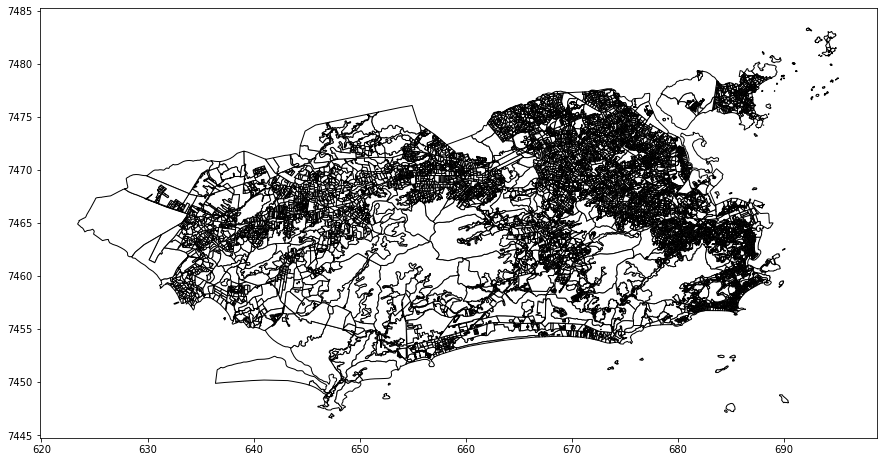

In [4]:
setor.plot(color='white', edgecolor='black', figsize=(15,8))

In [5]:
setor.head()

,ID1,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODD,NM_DISTRIT,CD_GEOCODS,NM_SUBDIST,CD_GEOCODM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,geometry
0,410890,330455705330018,URBANO,330455705156,Rocinha,330455705,RIO DE JANEIRO,330455705,ROCINHA,3304557,...,2.99,593.56,110532.97,681.79,66510.55,412.08,147976.22,658.21,74104.40,"POLYGON ((679.387 7456.374, 679.401 7456.395, ..."
1,410891,330455705330019,URBANO,330455705156,Rocinha,330455705,RIO DE JANEIRO,330455705,ROCINHA,3304557,...,2.88,378.27,209230.61,745.78,138022.78,431.95,242995.28,749.76,183389.25,"POLYGON ((679.459 7456.356, 679.457 7456.359, ..."
2,410892,330455705330020,URBANO,330455705156,Rocinha,330455705,RIO DE JANEIRO,330455705,ROCINHA,3304557,...,2.30,705.05,121767.60,757.04,91320.62,532.05,143295.24,701.27,70130.28,"POLYGON ((679.554 7456.388, 679.556 7456.391, ..."
3,410946,330455705330064,URBANO,330455705156,Rocinha,330455705,RIO DE JANEIRO,330455705,ROCINHA,3304557,...,2.69,686.60,214740.09,805.31,155993.62,483.81,239318.45,779.22,155061.31,"POLYGON ((679.976 7456.897, 679.977 7456.899, ..."
4,410893,330455705330021,URBANO,330455705156,Rocinha,330455705,RIO DE JANEIRO,330455705,ROCINHA,3304557,...,2.03,621.94,274726.99,731.99,242650.09,491.83,238726.75,720.79,184712.52,"POLYGON ((679.550 7456.471, 679.554 7456.460, ..."


In [9]:
setor_m = setor[['NM_BAIRRO', 'geometry']]

In [10]:
bairro = setor_m.dissolve(by='NM_BAIRRO')

In [11]:
bairro

,geometry
NM_BAIRRO,
Abolição,"POLYGON ((-43.29489 -22.88916, -43.29457 -22.8..."
Acari,"POLYGON ((-43.33882 -22.82658, -43.33949 -22.8..."
Alto da Boa Vista,"POLYGON ((-43.29377 -22.97986, -43.29380 -22.9..."
Anchieta,"POLYGON ((-43.41112 -22.83336, -43.41115 -22.8..."
Andaraí,"POLYGON ((-43.25436 -22.93422, -43.25436 -22.9..."
...,...
Vila Valqueire,"POLYGON ((-43.36722 -22.89664, -43.36718 -22.8..."
Vila da Penha,"POLYGON ((-43.30720 -22.84905, -43.30738 -22.8..."
Vista Alegre,"POLYGON ((-43.30903 -22.83303, -43.30909 -22.8..."


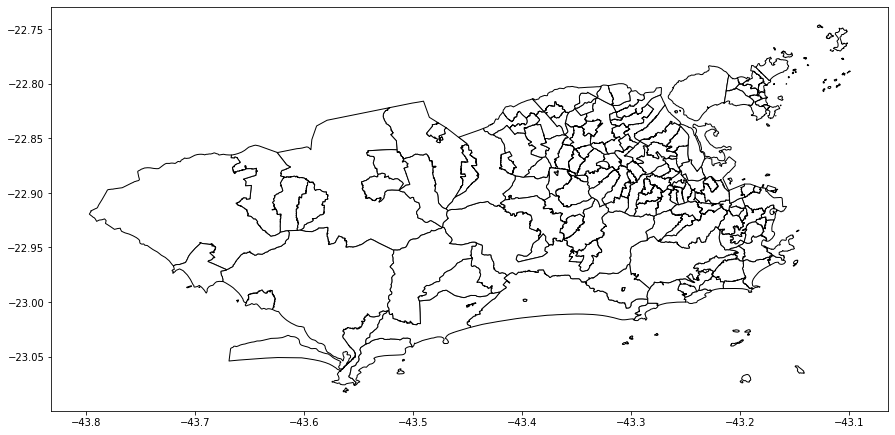

In [12]:
bairro.plot(color='white', edgecolor='black', figsize=(15,8))

In [13]:
setor_m = setor[['NM_BAIRRO', 'geometry', 'V002']]

In [14]:
bairro = setor_m.dissolve(by='NM_BAIRRO', aggfunc='sum')

In [15]:
bairro

,geometry,V002
NM_BAIRRO,,
Abolição,"POLYGON ((-43.29489 -22.88916, -43.29457 -22.8...",11356.0
Acari,"POLYGON ((-43.33882 -22.82658, -43.33949 -22.8...",26967.0
Alto da Boa Vista,"POLYGON ((-43.29377 -22.97986, -43.29380 -22.9...",9189.0
Anchieta,"POLYGON ((-43.41112 -22.83336, -43.41115 -22.8...",55634.0
Andaraí,"POLYGON ((-43.25436 -22.93422, -43.25436 -22.9...",39325.0
...,...,...
Vila Valqueire,"POLYGON ((-43.36722 -22.89664, -43.36718 -22.8...",32232.0
Vila da Penha,"POLYGON ((-43.30720 -22.84905, -43.30738 -22.8...",25462.0
Vista Alegre,"POLYGON ((-43.30903 -22.83303, -43.30909 -22.8...",8622.0


In [16]:
setor_m['V002'].sum()

6283486.0

In [18]:
bairro['V002'].sum()

6283486.0

In [20]:
bairro = bairro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [22]:
bairro.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [23]:
bairro.reset_index(inplace=True)

In [24]:
bairro

,NM_BAIRRO,geometry,V002
0,Abolição,"POLYGON ((674.902 7467.737, 674.936 7467.767, ...",11356.0
1,Acari,"POLYGON ((670.474 7474.718, 670.405 7474.689, ...",26967.0
2,Alto da Boa Vista,"POLYGON ((674.901 7457.693, 674.898 7457.693, ...",9189.0
3,Anchieta,"POLYGON ((663.045 7474.050, 663.041 7474.046, ...",55634.0
4,Andaraí,"POLYGON ((679.002 7462.700, 679.002 7462.700, ...",39325.0
...,...,...,...
155,Vila Valqueire,"POLYGON ((667.473 7466.993, 667.477 7466.985, ...",32232.0
156,Vila da Penha,"POLYGON ((673.691 7472.193, 673.672 7472.177, ...",25462.0
157,Vista Alegre,"POLYGON ((673.524 7473.970, 673.517 7473.968, ...",8622.0
158,Zumbi,"POLYGON ((687.240 7474.829, 687.239 7474.833, ...",2016.0


In [26]:
import os

dir = '../01.Dados/Mapas/RJ-BAIRRO'
if not os.path.exists(dir):
    os.makedirs(dir)
    
bairro.to_file(dir + '/RJ-BAIRRO.shp')